Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original shape: (235795, 56)
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4716/4716 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9967 - loss: 0.0141 - val_accuracy: 0.9999 - val_loss: 3.7616e-04
Epoch 2/2
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9999 - loss: 3.6162e-04 - val_accuracy: 0.9998 - val_loss: 6.6277e-04
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9997 - loss: 6.5214e-04

Test Accuracy: 0.9996
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



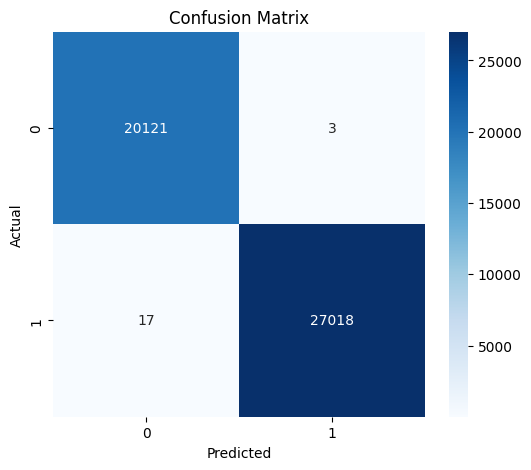

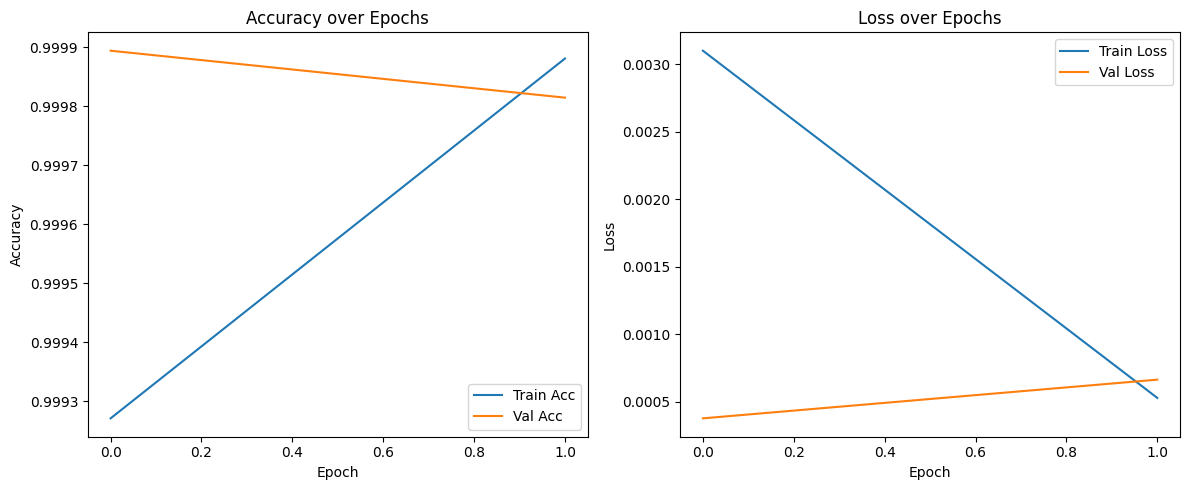

Model saved to /content/drive/MyDrive/ds2.h5


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load and preprocess dataset
import pandas as pd

file_path = '/content/drive/MyDrive/models/phishing/ds (2).csv'
df = pd.read_csv(file_path)

print("Original shape:", df.shape)

# Select only numeric columns (drop all string columns like URL, Domain, Title, etc.)
df = df.select_dtypes(include=['int64', 'float64'])

# Drop any rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {accuracy:.4f}')

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy and Loss graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('/content/drive/MyDrive/ds2.h5')
print("Model saved to /content/drive/MyDrive/ds2.h5")
